In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
energy_300 = np.loadtxt('T300_potential_energy.xvg', comments=['#', '@'])
energy_363 = np.loadtxt('T363_potential_energy.xvg', comments=['#', '@'])
energy_440 = np.loadtxt('T440_potential_energy.xvg', comments=['#', '@'])

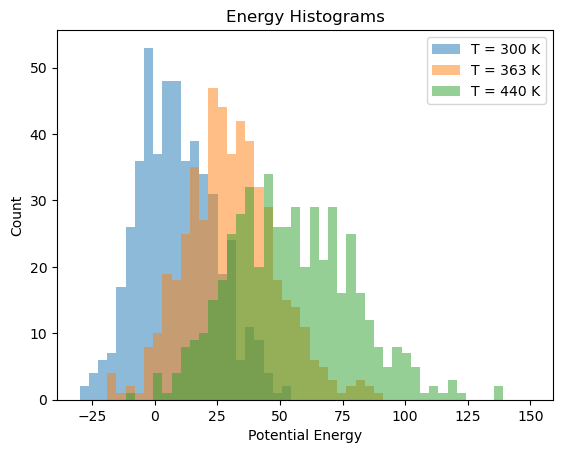

In [10]:
import matplotlib.pyplot as plt

bins = np.linspace(-30, 150, 50)

plt.hist(energy_300[:, 1], alpha=0.5, label='T = 300 K', bins=bins)
plt.hist(energy_363[:, 1], alpha=0.5, label='T = 363 K', bins=bins)
plt.hist(energy_440[:, 1], alpha=0.5, label='T = 440 K', bins=bins)

plt.xlabel('Potential Energy')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Energy Histograms')
plt.savefig('../Figures/energy_histograms.png')
plt.show()


/tmp/ipykernel_2914240/1659215250.py:8: RuntimeWarning: divide by zero encountered in log
  free_energy = -kT * np.log(hist)


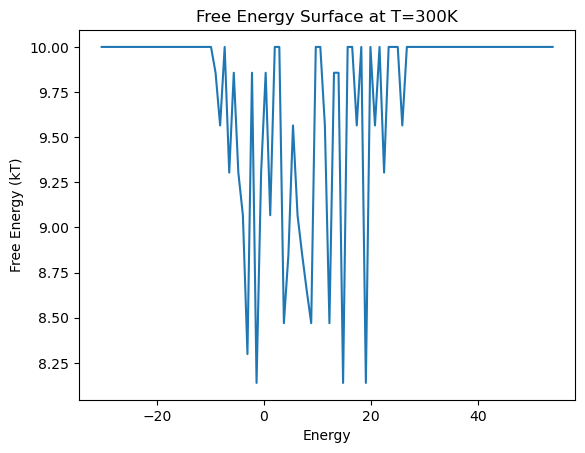

In [15]:
energy_data = energy_300[:, 1]

kT = 2.479  # Boltzmann constant * 300K in kJ/mol for T=300

hist, bin_edges = np.histogram(energy_data, bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

free_energy = -kT * np.log(hist)

free_energy[free_energy > 10] = 10

# 3. 可视化自由能曲面
plt.plot(bin_centers, free_energy)
plt.xlabel('Energy')
plt.ylabel('Free Energy (kT)')
plt.title('Free Energy Surface at T=300K')
plt.savefig('../Figures/free_energy_surface_T300.png')
plt.show()


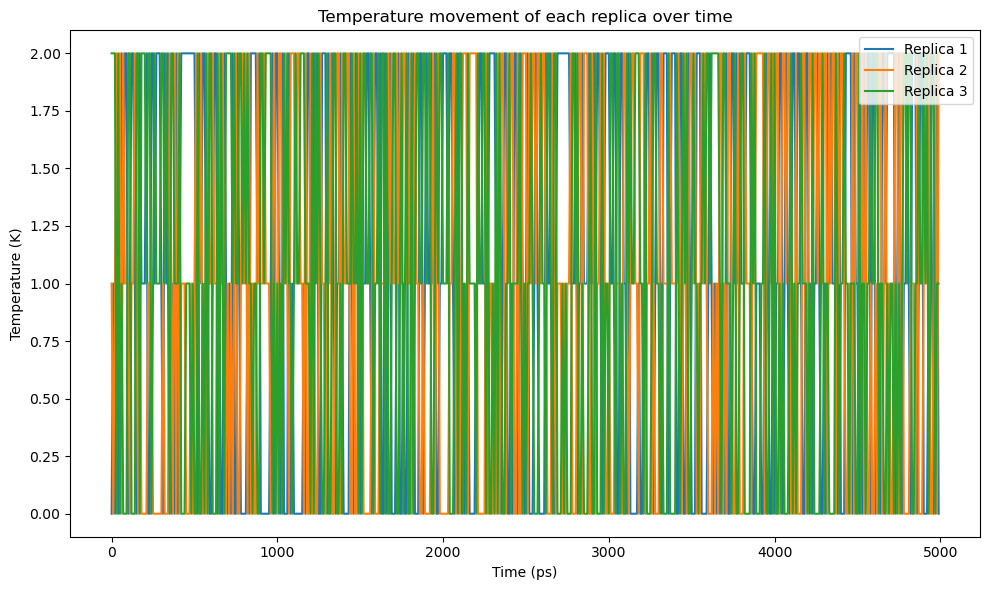

In [21]:
replica = np.loadtxt('T300_replica_temp.xvg')

time = replica[:, 0]
replica_temps = replica[:, 1:]

# Only plot every 1000th/100th point
time = time[::100]
replica_temps = replica_temps[::100, :]

# Plot
plt.figure(figsize=(10, 6))
for i, replica in enumerate(replica_temps.T, start=1):
    plt.plot(time, replica, label=f'Replica {i}')

plt.xlabel('Time (ps)')
plt.ylabel('Temperature (K)')
plt.title('Temperature movement of each replica over time')
plt.legend()
plt.tight_layout()
plt.savefig('../Figures/replica_temperatures_every100.png')
plt.show()